# Organizing and Classifying data

This notebook details our code for organizing data and writing our classification code

We start by importing the packages we will use and the data

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import tensorflow as tf
import pandas as pd
import pylab
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import check_array
from sklearn.cross_validation import train_test_split
from sklearn import svm

C:\Users\Rabi\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
env = Table.read_table('~/Downloads/hivBCDF-env.csv')
pol = Table.read_table('~/Downloads/hivBCDF-pol.csv')
gag = Table.read_table('~/Downloads/hivBCDF-gag.csv')

In [10]:
print(env.num_rows, pol.num_rows, gag.num_rows)

36778 6209 12662


Here, we combine all of the data sets together based on matching ids. We then added a three new columns that specified the subtype of that id

In [6]:
tot = Table(['id', 'env_sequence', 'pol_sequence', 'gag_sequence'])
for i in pol.column(0):
    if np.any(i == env.column(0)) and np.any(i == gag.column(0)):
        tot.append([i, env.where('id', i).column(1).item(0), pol.where('id', i).column(1).item(0), gag.where('id', i).column(1).item(0)])

In [10]:
B_num = []
C_num = []
D_num = []
for i in tot.column(0):
    if i[0] == 'B':
        B_num.append(1)
        C_num.append(0)
        D_num.append(0)
    elif i[0] == 'C':
        B_num.append(0)
        C_num.append(1)
        D_num.append(0)
    elif i[0] == 'D':
        B_num.append(0)
        C_num.append(0)
        D_num.append(1)

In [11]:
new_tot = tot.with_columns([
        'B', np.array(B_num),
        'C', np.array(C_num),
        'D', np.array(D_num)
    ])

In [12]:
new_tot.to_df().to_csv('~/Downloads/new_tot.csv', index = False)

In [8]:
exported_tot = Table.read_table('~/Downloads/new_tot.csv')

Next we calculate the hamming distances which we will use to classify our data with. We will calculate the hamming distance of a specific id by calculating its hamming distance with a random sequence from each of the other three subtypes

In [9]:
B=[]
C=[]
D=[]
for i in range(exported_tot.num_rows):
    if exported_tot.column('id')[i][0]=='B':
        B.append(exported_tot.column('id')[i])
    elif exported_tot.column('id')[i][0]=='C':
        C.append(exported_tot.column('id')[i])
    elif exported_tot.column('id')[i][0]=='D':
        D.append(exported_tot.column('id')[i])

In [10]:
B = np.array(B)
C = np.array(C)
D = np.array(D)

In [11]:
Btot = exported_tot.where('id', B)
Ctot = exported_tot.where('id', C)
Dtot = exported_tot.where('id', D)

In [12]:
def hammingDistance(s1, s2):
    """Return the Hamming distance between equal-length sequences"""
    if len(s1) != len(s2):
        raise ValueError("Undefined for sequences of unequal length")
    return sum(el1 != el2 for el1, el2 in zip(s1, s2))

In [24]:
Benv = []
Cenv = []
Denv = []
for i in exported_tot.column(0):
    Benv.append(hammingDistance(exported_tot.where(0,i).column(1)[0], Btot.sample().column(1)[0]))
    Cenv.append(hammingDistance(exported_tot.where(0,i).column(1)[0], Ctot.sample().column(1)[0]))
    Denv.append(hammingDistance(exported_tot.where(0,i).column(1)[0], Dtot.sample().column(1)[0]))

In [28]:
exported_tot.append_column('Benv hd', np.array(Benv))
exported_tot.append_column('Cenv hd', np.array(Cenv))
exported_tot.append_column('Denv hd', np.array(Denv))

In [30]:
exported_tot.to_df().to_csv('~/Downloads/exported_tot.csv', index = False)

In [10]:
exported_env_tot = Table.read_table('~/Downloads/exported_tot.csv')

In [11]:
Bpol = []
Cpol = []
Dpol = []
for i in exported_tot.column(0):
    Bpol.append(hammingDistance(exported_tot.where(0,i).column(2)[0], Btot.sample().column(2)[0]))
    Cpol.append(hammingDistance(exported_tot.where(0,i).column(2)[0], Ctot.sample().column(2)[0]))
    Dpol.append(hammingDistance(exported_tot.where(0,i).column(2)[0], Dtot.sample().column(2)[0]))

In [15]:
exported_env_tot.append_column('Bpol hd', np.array(Bpol))
exported_env_tot.append_column('Cpol hd', np.array(Cpol))
exported_env_tot.append_column('Dpol hd', np.array(Dpol))

In [18]:
exported_env_tot.to_df().to_csv('~/Downloads/exported_env_pol_tot.csv', index=False)

In [4]:
exported_env_pol_tot = Table.read_table('~/Downloads/exported_env_pol_tot.csv')

In [13]:
Bgag = []
Cgag = []
Dgag = []
for i in exported_tot.column(0):
    Bgag.append(hammingDistance(exported_tot.where(0,i).column(3)[0], Btot.sample().column(3)[0]))
    Cgag.append(hammingDistance(exported_tot.where(0,i).column(3)[0], Ctot.sample().column(3)[0]))
    Dgag.append(hammingDistance(exported_tot.where(0,i).column(3)[0], Dtot.sample().column(3)[0]))

In [15]:
exported_env_pol_tot.append_column('Bgag hd', np.array(Bgag))
exported_env_pol_tot.append_column('Cgag hd', np.array(Cgag))
exported_env_pol_tot.append_column('Dgag hd', np.array(Dgag))

In [16]:
exported_env_pol_tot.to_df().to_csv('~/Downloads/exported_env_pol_gag_tot.csv', index=False)

In [3]:
complete = Table.read_table("C:/Users/Rabi/Downloads/exported_env_pol_gag_tot.csv")

Now I am going to organize the data and add a new column called class that specifies which subtype that id is

In [4]:
classes = []
for i in complete.column('id'):
    if i[0] == 'B':
        classes.append(0)
    elif i[0] == 'C':
        classes.append(1)
    elif i[0] == 'D':
        classes.append(2)

In [5]:
complete.append_column('class', np.array(classes))
complete

id,env_sequence,pol_sequence,gag_sequence,B,C,D,Benv hd,Cenv hd,Denv hd,Bpol hd,Cpol hd,Dpol hd,Bgag hd,Cgag hd,Dgag hd,class
B.FR.1983.IIIB_LAI.A04321,ATGAGAGTGAA---GG---A---G-------------------------------- ...,TTTTT---TA---GGGAA---GATCTGGCCTTCC---T---A---CAAGGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---AGAA---TTAGATCGATG ...,1,0,0,417,554,445,132,313,176,61,239,150,0
D.CD.1983.ELI_patent.A07108,ATGAGAGCGAG---GG---G---G---A---T---A---G---A---G---AGA-- ...,TTTTT---TA---GGGAG---AATTTGGCCTTCC---C---A---CAAGGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---AAAA---TTAGATAAATG ...,0,0,1,512,597,347,233,309,185,206,223,139,2
B.FR.1983.LAI-J19.A07867,ATGAGAGTGAA---GG---A---G-------------------------------- ...,TTTTT---TA---GGGAA---GATCTGGCCTTCC---T---A---CAAGGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---AGAA---TTAGATCGATG ...,1,0,0,379,607,498,117,333,207,113,229,160,0
D.CD.1983.ELI_patent.A14116,ATGAGAGCGAG---GG---G---G---A---T---A---G---A---G---AGA-- ...,TTTTT---TA---GGGAG---AATTTGGCCTTCC---C---A---CAAGGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---AAAA---TTAGATAAATG ...,0,0,1,500,616,404,219,344,185,134,194,0,2
D.CD.1983.NDK_patent.A34828,ATGAGAGCGAG---GG---A---G---A---A---A---G---A---G---AGG-- ...,TTTTT---TA---GGGAA---GATTTGGCCTTCC---C---A---CAAGGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---AAAA---TTAGATACATG ...,0,0,1,469,627,425,230,314,185,174,204,178,2
C.IN.1993.93IN101.AB023804,ATGAGAGTGAG---GG---G---G---A---C---A---C---T---G---AGG-- ...,TTTTT---TA---GGGAA---AATTTGGCCTTCC---C---A---CAAGGGG---A ...,ATGGGTGCGAGAG---CGTCAATATTAAGAGGGGG---AAAA---TTAGATAAATG ...,0,1,0,564,353,548,351,142,425,250,81,211,1
B.US.1997.ARES2.AB078005,ATGAAAGCGAA---GG---G---G---A---C---C---A---G---G---AGG-- ...,TTTTT---TA---GGGAA---GATCTGGCCTTCC---C---A---CAAGGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---ACAA---TTAGATAGATG ...,1,0,0,287,551,488,167,324,241,111,233,137,0
B.MM.1999.mSTD101.AB097870,ATGAGAGTGAC---GG---G---G---A---T---C---A---G---G---AAG-- ...,TTTTT---TA---GGGAA---AATCTGGCCTTCC---C---A---CAAGGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---ACAA---TTAGATAGATG ...,1,0,0,450,597,481,184,361,269,101,241,185,0
C.MM.1999.mIDU101_3.AB097871,ATGAGAGTGAG---GG---G---G---A---C---A---C---G---G---AGG-- ...,TTTTT---TA---GGAAA---ACTTTGGCCTTCC---C---A---CAAGGGG---A ...,ATGGGTGCGAGAG---CGTCAATATTAAGAGGGGG---AAAA---TTAGATAAATG ...,0,1,0,568,451,591,340,188,356,245,116,225,1
B.US.1985.Ba_L.AB221005,ATGAGAGTGAT---GG---A---G---A---T---C---A---G---G---AGG-- ...,TTTTT---TA---GGGAA---AATCTGGCCTTCC---C---A---CAAAGGA---A ...,ATGGGTGCGAGAG---CGTCAGTATTAAGCGGGGG---AGAA---TTAGATAGGTG ...,1,0,0,338,656,384,170,352,274,141,237,180,0


In [6]:
abr = complete.select(['class', 'Benv hd', 'Cenv hd', 'Denv hd', 'Bgag hd', 'Cgag hd', 'Dgag hd', 'Bpol hd', 'Cpol hd', 'Dpol hd'])
abr

class,Benv hd,Cenv hd,Denv hd,Bgag hd,Cgag hd,Dgag hd,Bpol hd,Cpol hd,Dpol hd
0,417,554,445,61,239,150,132,313,176
2,512,597,347,206,223,139,233,309,185
0,379,607,498,113,229,160,117,333,207
2,500,616,404,134,194,0,219,344,185
2,469,627,425,174,204,178,230,314,185
1,564,353,548,250,81,211,351,142,425
0,287,551,488,111,233,137,167,324,241
0,450,597,481,101,241,185,184,361,269
1,568,451,591,245,116,225,340,188,356
0,338,656,384,141,237,180,170,352,274


Here are some data visualizations based on our hamming distances

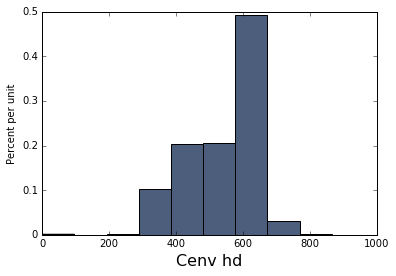

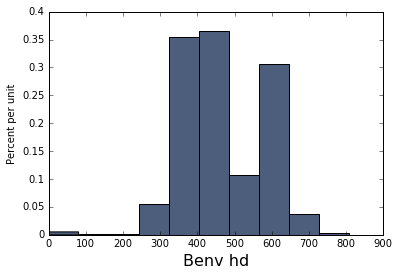

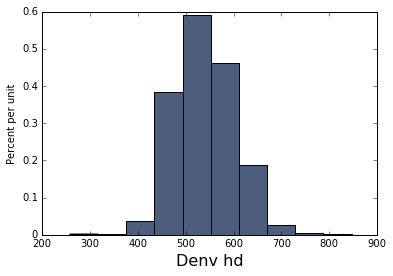

In [7]:
abr.hist('Cenv hd')
abr.hist('Benv hd')
abr.hist('Denv hd')

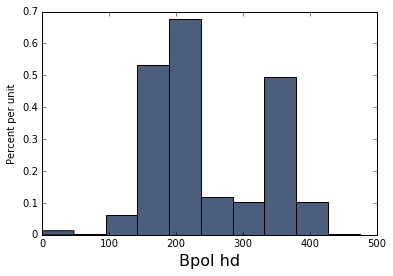

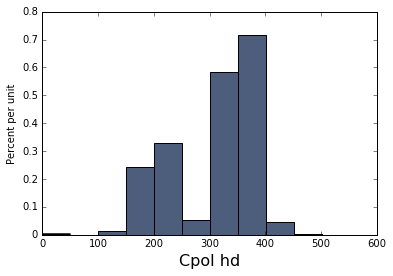

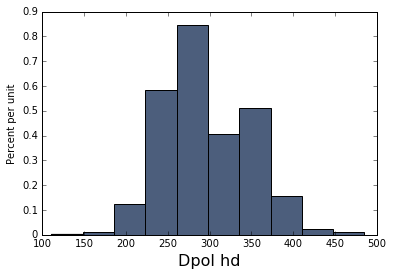

In [8]:
abr.hist('Bpol hd')
abr.hist('Cpol hd')
abr.hist('Dpol hd')

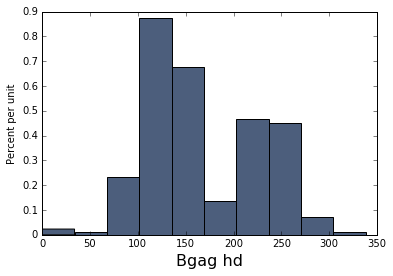

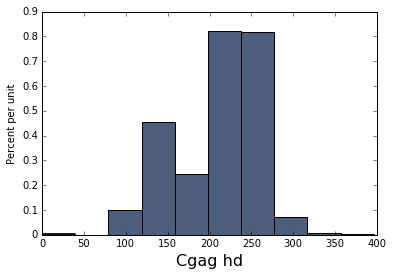

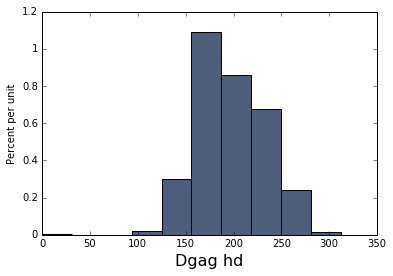

In [9]:
abr.hist('Bgag hd')
abr.hist('Cgag hd')
abr.hist('Dgag hd')

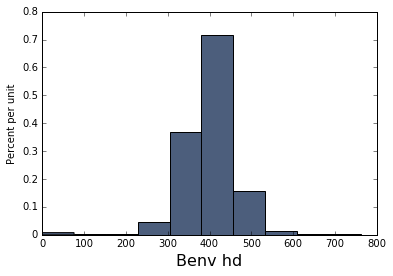

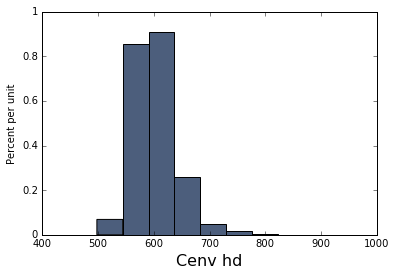

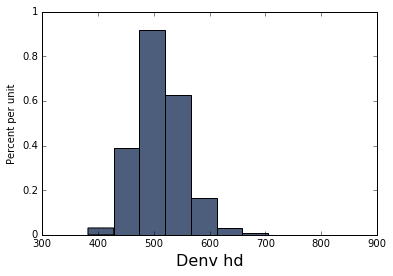

In [10]:
complete.where('B', 1).hist('Benv hd')
complete.where('B', 1).hist('Cenv hd')
complete.where('B', 1).hist('Denv hd')

In [10]:
for i in complete.select(['id', 'class']).where('class', 2).column('id'):
    if i[0] != 'D':
        print('Error! ' + i)

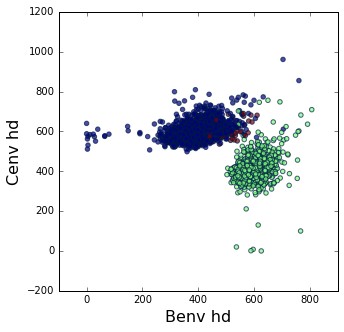

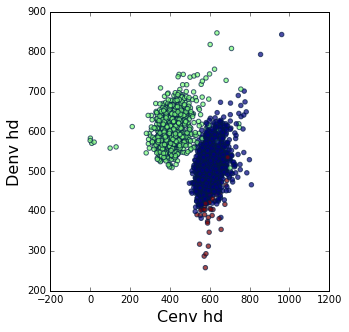

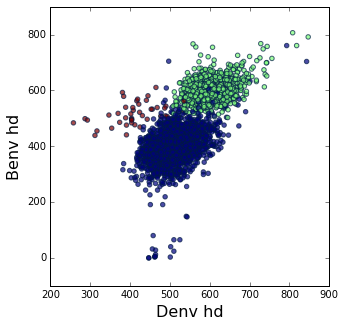

In [9]:
abr.scatter('Benv hd', 'Cenv hd', c=complete.column('class'))
abr.scatter('Cenv hd', 'Denv hd', c=complete.column('class'))
abr.scatter('Denv hd', 'Benv hd', c=complete.column('class'))

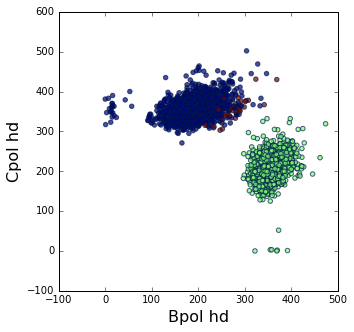

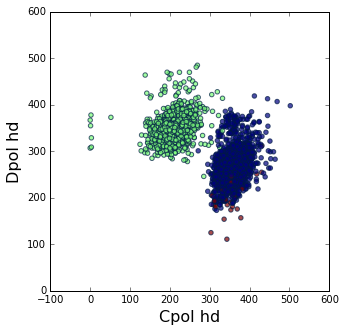

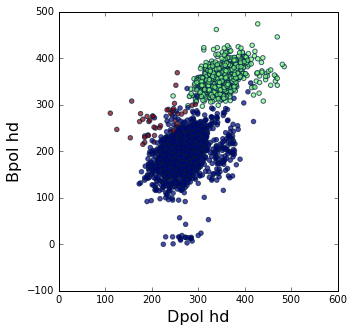

In [23]:
abr.scatter('Bpol hd', 'Cpol hd', c=complete.column('class'))
abr.scatter('Cpol hd', 'Dpol hd', c=complete.column('class'))
abr.scatter('Dpol hd', 'Bpol hd', c=complete.column('class'))

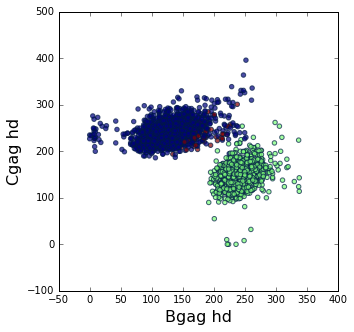

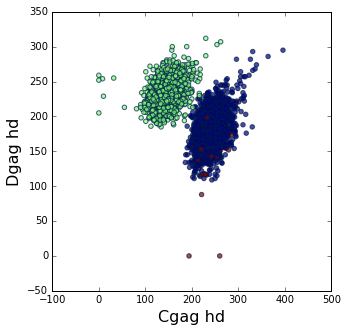

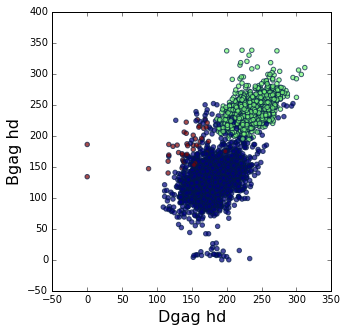

In [24]:
abr.scatter('Bgag hd', 'Cgag hd', c=complete.column('class'))
abr.scatter('Cgag hd', 'Dgag hd', c=complete.column('class'))
abr.scatter('Dgag hd', 'Bgag hd', c=complete.column('class'))

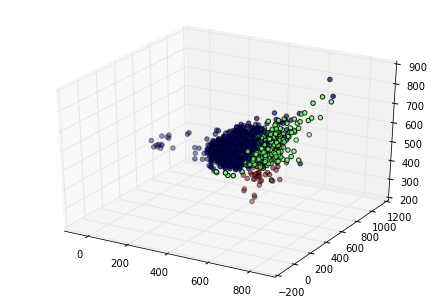

In [12]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(complete.column('Benv hd'), complete.column('Cenv hd'), complete.column('Denv hd'), c=complete.column('class'))
#for ii in range(0,360,1):
 #   ax.view_init(elev=10., azim=ii)
 #   fig.savefig('movie%d.png' % ii)
plt.show()

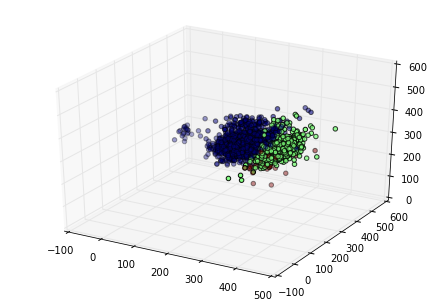

In [25]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(complete.column('Bpol hd'), complete.column('Cpol hd'), complete.column('Dpol hd'), c=complete.column('class'))
plt.show()

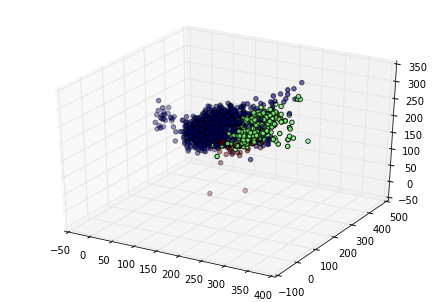

In [26]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(complete.column('Bgag hd'), complete.column('Cgag hd'), complete.column('Dgag hd'), c=complete.column('class'))
plt.show()

Then we randomly sample the data and create our testing and training sets and classify

Here is our logistic regression classification code

In [12]:
train = complete.to_df()
y, X = train['class'], train[['Benv hd', 'Cenv hd', 'Denv hd']].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(accuracy_score(lr.predict(X_test), y_test))

[[-0.05872175  0.03093571  0.02485642]
 [ 0.03493881 -0.0486973   0.01471493]
 [ 0.03991939  0.02000349 -0.07187371]]
[  7.22596270e-05  -1.65501245e-04  -1.19028501e-04]
1.0


In [25]:
#print(min(lr.decision_function(X)), max(lr.decision_function(X)))
lr.decision_function(X)

array([[  3.71258697,  -5.86084075,  -4.2556011 ],
       [ -2.97167295,  -6.07770002,   7.44051453],
       [  8.90099598,  -8.98958126,  -8.52165982],
       ..., 
       [  1.57973257,  -6.79086117,   0.98371429],
       [  7.89612598, -11.60017726,  -2.29150434],
       [ 13.07336847, -10.68846843, -12.494653  ]])

In [18]:
lr.predict_proba(X)

array([[  9.83054359e-01,   2.86079595e-03,   1.40848455e-02],
       [  4.63833088e-02,   2.17835683e-03,   9.51438334e-01],
       [  9.99676305e-01,   1.24663374e-04,   1.99031708e-04],
       ..., 
       [  5.32153625e-01,   7.20566053e-04,   4.67125809e-01],
       [  9.15857966e-01,   8.39639341e-06,   8.41336376e-02],
       [  9.99973448e-01,   2.28053435e-05,   3.74652731e-06]])

In [11]:
train = complete.to_df()
y, X = train['B'], train[['Benv hd', 'Cenv hd', 'Denv hd']].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(accuracy_score(lr.predict(X_test), y_test))
Bcoef = lr.coef_
Bint = lr.intercept_

[[-0.05872175  0.03093571  0.02485642]]
[  7.22596270e-05]
0.998493975904


In [12]:
train = complete.to_df()
y, X = train['C'], train[['Benv hd', 'Cenv hd', 'Denv hd']].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(accuracy_score(lr.predict(X_test), y_test))
Ccoef = lr.coef_
Cint = lr.intercept_

[[ 0.03493881 -0.0486973   0.01471493]]
[-0.0001655]
0.998493975904


In [13]:
train = complete.to_df()
y, X = train['D'], train[['Benv hd', 'Cenv hd', 'Denv hd']].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(accuracy_score(lr.predict(X_test), y_test))
Dcoef = lr.coef_
Dint = lr.intercept_

[[ 0.03991939  0.02000349 -0.07187371]]
[-0.00011903]
1.0


Here are some attempts to graph decision boundaries, but we made little progress on this front

/home/raviolli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


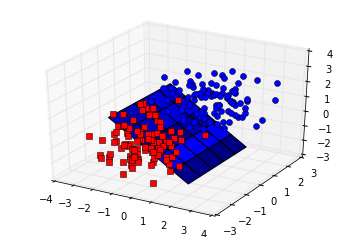

In [24]:
rs = np.random.RandomState(1234)

# Generate some fake data.
n_samples = 200
# X is the input features by row.
X = np.zeros((200,3))
X[:100] = rs.multivariate_normal( np.ones(3), np.eye(3), size=100)
X[100:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=100)
Y = np.zeros(n_samples); Y[n_samples/2:] = 1

# Fit the data with an svm
svc = svm.SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should for the last coordinate to plot
# the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

In [25]:
svc.coef_

array([[-1.22767203, -1.12155427, -1.45459886]])

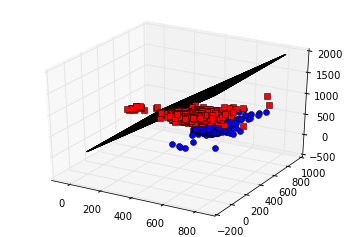

In [44]:
z = lambda x,y: (-Bint[0]-Bcoef[0][0]*x-Bcoef[0][1]) / Bcoef[0][2]
#z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]) / svc.coef_[0][2]
X=complete.select(['Benv hd','Cenv hd', 'Denv hd']).to_df().as_matrix()
Y=complete.column('B')

#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(np.arange(min(complete.column('Benv hd'))-1,max(complete.column('Benv hd'))+1),np.arange(min(complete.column('Cenv hd'))-1,max(complete.column('Cenv hd'))+1))
#tmp = np.linspace(-2,2,51)
#x,y = np.meshgrid(tmp,tmp)
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

And here is our SVC code

In [29]:
C=1.0
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
print(accuracy_score(svc.predict(X_test), y_test))
svm.SVC.get_params(poly_svc.fit(X_train, y_train),deep=True)

0.996987951807


{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Here is our beginning attempts to classify the geographical origins of specific subtypes

In [67]:
bs = complete.where('B', 1)
countriys = []
for i in bs.column(0):
    x = i[2]+i[3]
    if x == 'FR':
        countriys.append(0)
    if x == 'US':
        countriys.append(1)
    if x == 'MM':
        countriys.append(2)
    if x == 'JP':
        countriys.append(3)
    if x == 'BR':
        countriys.append(4)
    if x == 'AU':
        countriys.append(5)
    if x == 'TW':
        countriys.append(6)
    if x == 'KR':
        countriys.append(7)
    if x == 'ES':
        countriys.append(8)
    if x == 'GB':
        countriys.append(9)
    if x == 'TH':
        countriys.append(10)
    if x == 'CN':
        countriys.append(11)
    if x == 'CA':
        countriys.append(12)
    if x == 'NL':
        countriys.append(13)
    if x == 'CU':
        countriys.append(14)
    if x == 'RU':
        countriys.append(15)
    if x == 'ZA':
        countriys.append(16)
    if x == 'IT':
        countriys.append(17)
    if x == 'DK':
        countriys.append(18)
    if x == 'IN':
        countriys.append(19)
    if x == 'CY':
        countriys.append(20)
    if x == 'HK':
        countriys.append(21)
    if x == 'PE':
        countriys.append(22)
    if x == 'CH':
        countriys.append(23)
    if x == 'DE':
        countriys.append(24)
    if x == 'PL':
        countriys.append(25)
    if x == 'SE':
        countriys.append(26)
    if x == '-.':
        countriys.append(27)
    if x == 'GA':
        countriys.append(28)

In [75]:
bs.append_column('country', np.array(countriys))
b_countries = bs.select(['id', 'env_sequence', 'pol_sequence', 'gag_sequence', 'country']).where('country', are.not_equal_to(27))

In [77]:
b_countries.group('country').show()

country,count
0,41
1,1225
2,1
3,68
4,201
5,37
6,1
7,47
8,113
9,17


In [58]:
bs.column(0)

array(['B.FR.1983.IIIB_LAI.A04321', 'B.FR.1983.LAI-J19.A07867',
       'B.US.1997.ARES2.AB078005', ..., 'B.CN.-.RL42.U71182',
       'B.FR.1983.REHTLV3_LAI_IIIB.X01762', 'B.FR.-.F12CG.Z11530'], 
      dtype='<U54')